In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

print(f"Original x_train shape: {x_train.shape}")
print(f"Original x_test shape: {x_test.shape}")


Original x_train shape: (60000, 28, 28)
Original x_test shape: (10000, 28, 28)


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Processed x_train shape: {x_train.shape}")
print(f"Processed x_test shape: {x_test.shape}")

input_dim = x_train.shape[1] # 784

encoding_dim = 32 

Processed x_train shape: (60000, 784)
Processed x_test shape: (10000, 784)


In [4]:
input_img = keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded) # Bottleneck layer

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)

autoencoder.summary()
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

Epoch 1/50
235/235 [==============================] - 3s 7ms/step - loss: 0.2423 - val_loss: 0.1639
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1494 - val_loss: 0.1370
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1324 - val_loss: 0.1261
Epoch 4/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1242 - val_loss: 0.1193
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1181 - val_loss: 0.1143
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1139 - val_loss: 0.1111
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1107 - val_loss: 0.1081
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1075 - val_loss: 0.1046
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1048 - val_loss: 0.1027
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1028 - val_loss: 0.1009

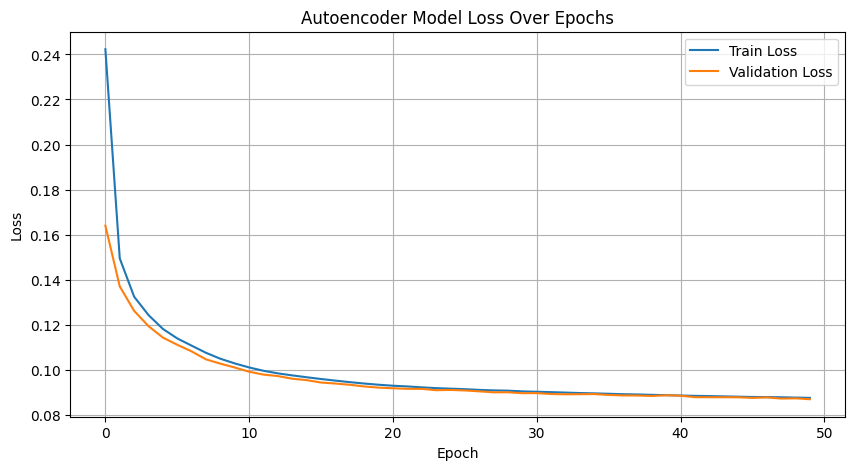

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 [==============================] - 0s 1ms/step


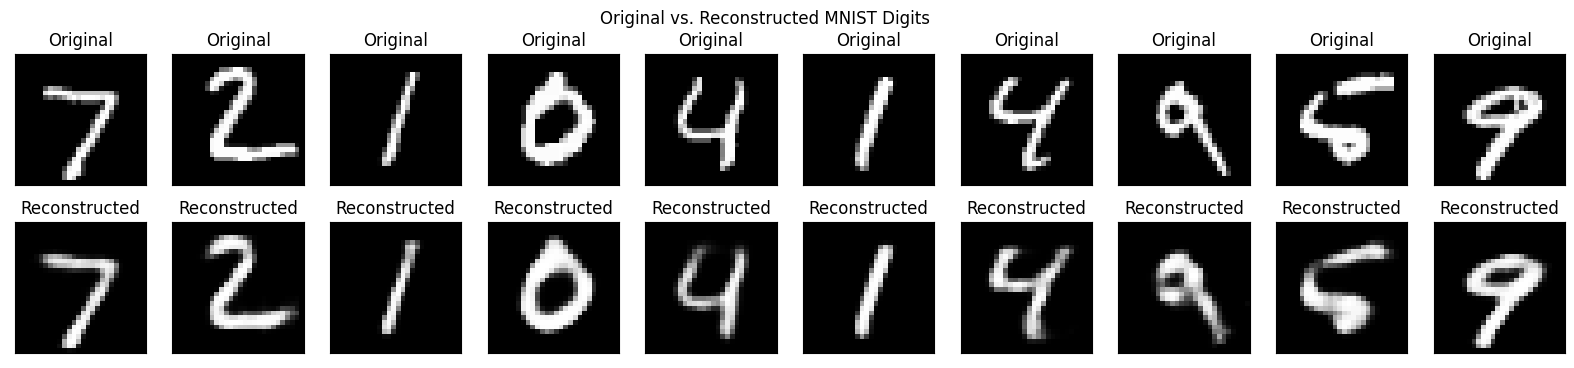

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.suptitle('Original vs. Reconstructed MNIST Digits')
plt.show()

In [8]:
test_loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"Final Test Reconstruction Loss (Binary Cross-entropy): {test_loss:.4f}")

mse = np.mean(np.power(x_test - decoded_imgs, 2))
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")

Final Test Reconstruction Loss (Binary Cross-entropy): 0.0869
Mean Squared Error (MSE) on Test Set: 0.0084
